In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
both = zip(lats, lngs)
lat_lngs = list(both)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
#     "citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
#     

    # Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


   

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | fushan
Processing Record 1 of Set 1 | binga
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | atuona
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fushan,37.4958,121.2581,42.03,31,0,15.35,CN,1670298494
1,binga,-17.6203,27.3414,77.36,48,47,0.98,ZW,1670298494
2,punta arenas,-53.1500,-70.9167,41.11,70,40,10.36,CL,1670298239
3,hobart,-42.8794,147.3294,61.27,58,75,17.27,AU,1670298495
4,bluff,-46.6000,168.3333,50.81,59,12,14.83,NZ,1670298495


In [7]:
# Export the City_Data into a csv
output_data = "D:\cities.csv"
city_data_df.to_csv(output_data, index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(output_data, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fushan,37.4958,121.2581,42.03,31,0,15.35,CN,1670298494
1,binga,-17.6203,27.3414,77.36,48,47,0.98,ZW,1670298494
2,punta arenas,-53.1500,-70.9167,41.11,70,40,10.36,CL,1670298239
3,hobart,-42.8794,147.3294,61.27,58,75,17.27,AU,1670298495
4,bluff,-46.6000,168.3333,50.81,59,12,14.83,NZ,1670298495


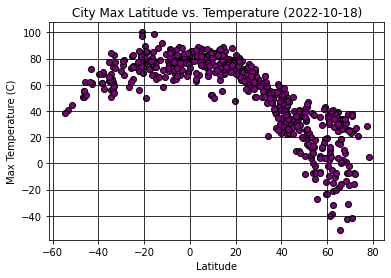

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("D:/output_data/Fig1.png")

# # Show plot
plt.show()

In [10]:
#### Latitude Vs. Humidity

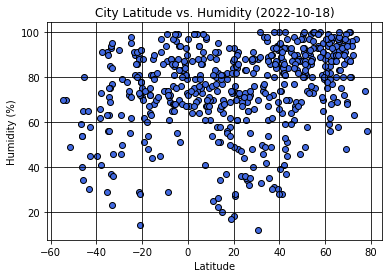

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="royalblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("D:/output_data/Fig2.png")

# Show plot
plt.show()

In [12]:
#### Latitude Vs. Cloudiness

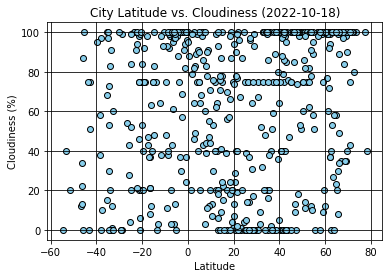

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("D:/output_data/Fig3.png")

# Show plot
plt.show()

In [14]:
#### Latitude vs. Wind Speed Plot

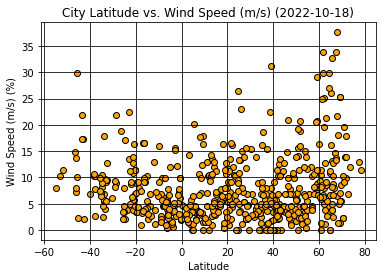

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s) (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s) (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("D:/output_data/Fig4.png")

# Show plot
plt.show()

In [16]:
## Requirement 2: Compute Linear Regression for Each Relationship

In [34]:
# Define a function to create Linear Regression plots
def plotLinearRegression(x,y,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-squared is: {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("D:/output_data/fig{ifig}.png")
    plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

In [36]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fushan,37.4958,121.2581,42.03,31,0,15.35,CN,1670298494
5,albany,42.6001,-73.9662,37.85,59,98,4.97,US,1670298328
9,kapaa,22.0752,-159.3190,78.78,91,100,16.11,US,1670298497
11,dikson,73.5069,80.5464,21.16,97,100,11.92,RU,1670298497
12,hamilton,39.1834,-84.5333,45.23,92,100,8.05,US,1670298498


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,binga,-17.6203,27.3414,77.36,48,47,0.98,ZW,1670298494
2,punta arenas,-53.1500,-70.9167,41.11,70,40,10.36,CL,1670298239
3,hobart,-42.8794,147.3294,61.27,58,75,17.27,AU,1670298495
4,bluff,-46.6000,168.3333,50.81,59,12,14.83,NZ,1670298495
6,busselton,-33.6500,115.3333,73.74,37,0,9.28,AU,1670298496


In [38]:
###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8568721597756584


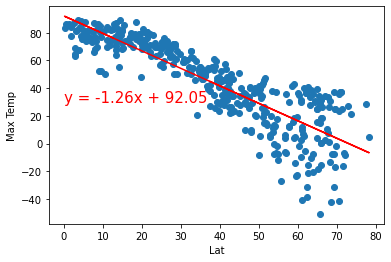

In [42]:
# Linear regression on Northern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,30)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: 0.598197139418234


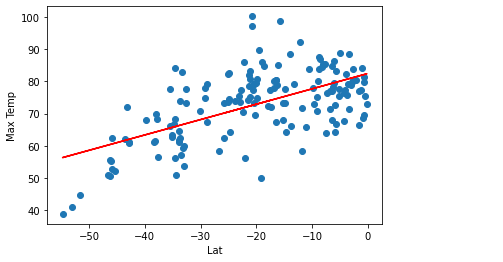

In [53]:
# Linear regression on Southern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-50,20)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,10)

In [ ]:
### **Discussion about the linear relationship:** The northern hemisphere regression displays a negative correlation between latitude and max temp. The southern hemisphere regression displays more of a positive correlation.

In [ ]:
### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3243457318375331


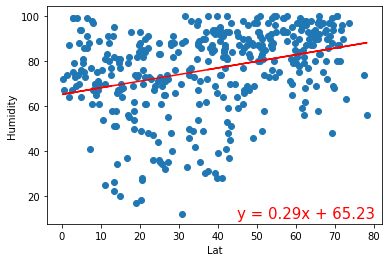

In [51]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: 0.3734890937928712


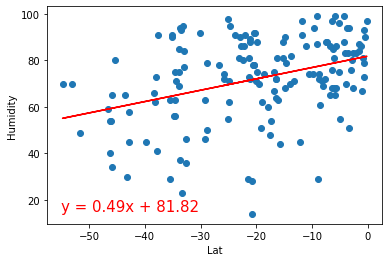

In [54]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,8)

In [ ]:
### **Discussion about the linear relationship:** For both the northern and southern hemisphere, there is almost no correlation between humidity and latitude. 

In [ ]:
### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2865567934754409


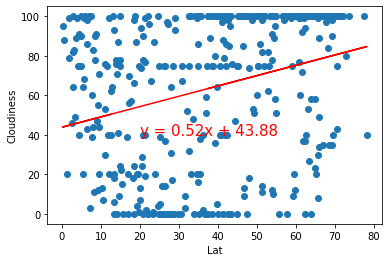

In [55]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: 0.3571501883349974


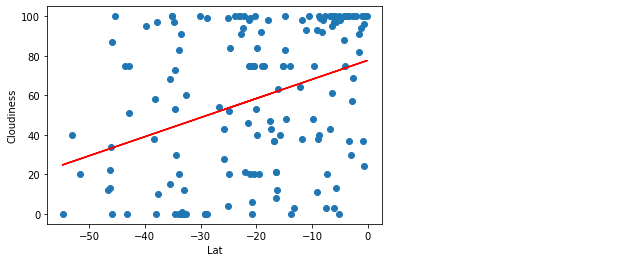

In [56]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,9)

In [ ]:
### **Discussion about the linear relationship:** For both hemispheres, there is almost no correlation between cloudiness and latitude. 

In [ ]:
### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2746300714698154


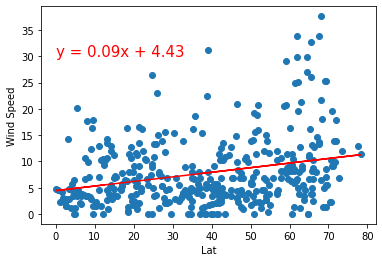

In [58]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,12)

The r-squared is: -0.3531930354173867


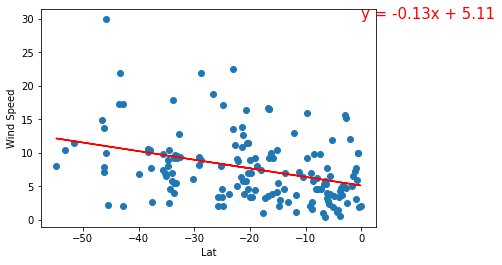

In [60]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,12)

In [ ]:
### **Discussion about the linear relationship:** Based on the regression from both plots, there are higher wind speeds in the northern hemisphere than southern.